

# About the Dataset:

   ### 1)id: unique id for a news article
   ### 2)title: the title of a news article
   ### 3)author: author of the news article
   ### 4)text: the text of the article; could be incomplete
   ### 5)label: a label that marks whether the news article is real or fake:

>    ###       1: Fake news
>    ###       0: real News



# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

### Downloading NLTK Stopwords for Text Preprocessing

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### printing the stopwords in English

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Explore Data 

### Reading Data by using pandas

In [5]:
df=pd.read_csv("/kaggle/input/fake-news-predictions/train.csv")

### Reading first 5 rows

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Displaying DataFrame Information and Summary

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


### Displaying Column Names of the DataFrame

In [7]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

### Displaying the Dimensions of the DataFrame

In [138]:
df.shape

(20800, 5)

### Counting Duplicated Rows in the DataFrame

In [142]:
df.duplicated().sum()

0

### Counting Missing Values in Each Column

In [139]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Cleaning Data 

### Handling Missing Data by Replacing NaN with Empty Strings in DataFrame

In [140]:
df=df.fillna("")

### Counting Missing Values in Each Column of the DataFrame

In [141]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

# Data Preprocessing

### Creating a Combined Column from Author and Title

In [143]:
df['content'] = df['author']+' '+df['title']
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


### Separating Features and Label from DataFrame and Displaying Shapes

In [144]:
x = df.drop(columns='label', axis=1)
y = df['label']
print(f" The Shape Of Features is {x.shape}")
print(f" The Shape Of Label is {y.shape}")

 The Shape Of Features is (20800, 5)
 The Shape Of Label is (20800,)


### Initializing the Porter Stemmer for Text Preprocessing

In [145]:
port_stem = PorterStemmer()

### Text Preprocessing with Stemming and Stopword Removal

In [146]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

### Applying Stemming and Stopword Removal to Content Column

In [147]:
df['content'] = df['content'].apply(stemming)

### Accessing the Content Column in the DataFrame

In [148]:
df["content"]

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

# Building Model 

### Preparing Data: Extracting Features and Labels from DataFrame

In [149]:
x= df['content'].values
y= df['label'].values

### Displaying the Shape and Contents of Feature Array

In [150]:
print(f" The Shape Of Features is {x.shape}")
print(x)

 The Shape Of Features is (20800,)
['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


### Displaying the Shape and Contents of Label Array

In [151]:
print(f" The Shape Of Label is {y.shape}")
print(y)

 The Shape Of Label is (20800,)
[1 0 1 ... 0 1 1]


### converting the textual data to numerical data

In [152]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x= vectorizer.transform(x)

In [153]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20

### Data Split: Creating Training and Test Sets for Model Evaluation

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

### Displaying Shapes of Training and Testing Datasets

In [155]:
print(f"The Shape Of x_train Is {x_train.shape}")
print(f"The Shape Of x_test Is {x_test.shape}")
print(f"The Shape Of y_train Is {y_train.shape}")
print(f"The Shape Of y_test Is {y_test.shape}")

The Shape Of x_train Is (16640, 17128)
The Shape Of x_test Is (4160, 17128)
The Shape Of y_train Is (16640,)
The Shape Of y_test Is (4160,)


### Initializing Logistic Regression Model for Classification

In [156]:
model = LogisticRegression()

### Training Logistic Regression Model on Training Data

In [157]:
model.fit(x_train, y_train)

LogisticRegression()

### Making Predictions on Training Data with Logistic Regression

In [158]:
# accuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

### Displaying Accuracy Score of the Training Data

In [159]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


### Making Predictions on Test Data with Logistic Regression

In [160]:
# accuracy score on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

### Displaying Accuracy Score of the Test Data

In [161]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


### Predicting and Classifying News Instances from Test Data

In [162]:
for i in range(5):
    x_new = x_test[i]

    prediction = model.predict(x_new)
    print(prediction)

    if (prediction[0]==0):
        print('The news is Real')
    else:
        print('The news is Fake')
    print("**************************")

[1]
The news is Fake
**************************
[0]
The news is Real
**************************
[1]
The news is Fake
**************************
[0]
The news is Real
**************************
[0]
The news is Real
**************************


### Evaluating Model Performance with Classification Report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2018
           1       0.99      0.97      0.98      2142

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



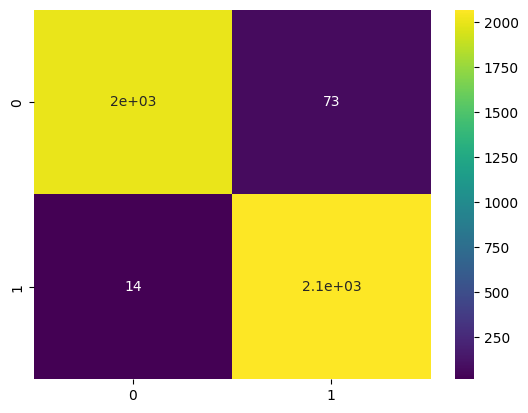

In [163]:
pre=model.predict(x_test)
print(classification_report(pre,y_test))
con=confusion_matrix(y_test,pre)
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) 
plt.show()